# FUENTE DE LOS DATOS: https://power.larc.nasa.gov/data-access-viewer/

In [1]:
# Importar las librerías básicas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# PREPROCESADO Y ANÁLISIS

## 1- Importar el dataset y darle la forma deseada. Nos quedaremos con mes, temp máx y temp mín

In [2]:
dataset = pd.read_csv("Datos_Benito_Villamarin.csv", sep = ';')
dataset

,YEAR,MO,DY,T2M_MAX,T2M_MIN,PRECTOTCORR,PS
0,1983,1,1,14.24,0.69,0.00,100.87
1,1983,1,2,13.11,-1.12,0.00,101.00
2,1983,1,3,13.94,0.01,0.00,101.14
3,1983,1,4,16.24,0.91,0.00,101.23
4,1983,1,5,17.07,3.06,0.00,101.09
...,...,...,...,...,...,...,...
14606,2022,12,28,19.92,7.19,0.00,100.36
14607,2022,12,29,17.58,7.56,0.03,100.32
14608,2022,12,30,18.35,8.64,0.12,100.39
14609,2022,12,31,17.90,4.55,0.00,100.30


,YEAR,MO,DY,T2M_MAX,T2M_MIN,PRECTOTCORR,PS
0,1983,1,1,14.24,0.69,0.00,100.87
1,1983,1,2,13.11,-1.12,0.00,101.00
2,1983,1,3,13.94,0.01,0.00,101.14
3,1983,1,4,16.24,0.91,0.00,101.23
4,1983,1,5,17.07,3.06,0.00,101.09
...,...,...,...,...,...,...,...
14606,2022,12,28,19.92,7.19,0.00,100.36
14607,2022,12,29,17.58,7.56,0.03,100.32
14608,2022,12,30,18.35,8.64,0.12,100.39
14609,2022,12,31,17.90,4.55,0.00,100.30


In [3]:
dataset = dataset.iloc[:, [0, 1, 2, 3, 4]]
dataset

,YEAR,MO,DY,T2M_MAX,T2M_MIN
0,1983,1,1,14.24,0.69
1,1983,1,2,13.11,-1.12
2,1983,1,3,13.94,0.01
3,1983,1,4,16.24,0.91
4,1983,1,5,17.07,3.06
...,...,...,...,...,...
14606,2022,12,28,19.92,7.19
14607,2022,12,29,17.58,7.56
14608,2022,12,30,18.35,8.64
14609,2022,12,31,17.90,4.55


,YEAR,MO,DY,T2M_MAX,T2M_MIN
0,1983,1,1,14.24,0.69
1,1983,1,2,13.11,-1.12
2,1983,1,3,13.94,0.01
3,1983,1,4,16.24,0.91
4,1983,1,5,17.07,3.06
...,...,...,...,...,...
14606,2022,12,28,19.92,7.19
14607,2022,12,29,17.58,7.56
14608,2022,12,30,18.35,8.64
14609,2022,12,31,17.90,4.55


In [4]:
dataset["DATE"] = pd.to_datetime(dataset["YEAR"].astype(str) + "-" + 
                                  dataset["MO"].astype(str) + "-" + 
                                  dataset["DY"].astype(str), 
                                  format="%Y-%m-%d").dt.date

dataset.insert(0, "DATE", dataset.pop("DATE"))
dataset

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10528\361551939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["DATE"] = pd.to_datetime(dataset["YEAR"].astype(str) + "-" +


,DATE,YEAR,MO,DY,T2M_MAX,T2M_MIN
0,1983-01-01,1983,1,1,14.24,0.69
1,1983-01-02,1983,1,2,13.11,-1.12
2,1983-01-03,1983,1,3,13.94,0.01
3,1983-01-04,1983,1,4,16.24,0.91
4,1983-01-05,1983,1,5,17.07,3.06
...,...,...,...,...,...,...
14606,2022-12-28,2022,12,28,19.92,7.19
14607,2022-12-29,2022,12,29,17.58,7.56
14608,2022-12-30,2022,12,30,18.35,8.64
14609,2022-12-31,2022,12,31,17.90,4.55


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10528\361551939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["DATE"] = pd.to_datetime(dataset["YEAR"].astype(str) + "-" +


,DATE,YEAR,MO,DY,T2M_MAX,T2M_MIN
0,1983-01-01,1983,1,1,14.24,0.69
1,1983-01-02,1983,1,2,13.11,-1.12
2,1983-01-03,1983,1,3,13.94,0.01
3,1983-01-04,1983,1,4,16.24,0.91
4,1983-01-05,1983,1,5,17.07,3.06
...,...,...,...,...,...,...
14606,2022-12-28,2022,12,28,19.92,7.19
14607,2022-12-29,2022,12,29,17.58,7.56
14608,2022-12-30,2022,12,30,18.35,8.64
14609,2022-12-31,2022,12,31,17.90,4.55


## 2- Análisis previo del dataset

In [5]:
dataset.dtypes

DATE        object
YEAR         int64
MO           int64
DY           int64
T2M_MAX    float64
T2M_MIN    float64
dtype: object

DATE        object
YEAR         int64
MO           int64
DY           int64
T2M_MAX    float64
T2M_MIN    float64
dtype: object

In [6]:
dataset.isna().any().any() # No hay valores nulos

False

False

In [7]:
dataset.describe()

,YEAR,MO,DY,T2M_MAX,T2M_MIN
count,14611.000000,14611.000000,14611.000000,14611.000000,14611.000000
mean,2002.501061,6.522552,15.728629,24.897223,11.481236
std,11.544613,3.449006,8.800936,16.996523,15.758233
min,1983.000000,1.000000,1.000000,-999.000000,-999.000000
25%,1992.500000,4.000000,8.000000,17.640000,6.660000
50%,2003.000000,7.000000,16.000000,23.660000,11.150000
75%,2012.500000,10.000000,23.000000,32.680000,17.080000
max,2023.000000,12.000000,31.000000,46.260000,28.270000


,YEAR,MO,DY,T2M_MAX,T2M_MIN
count,14611.000000,14611.000000,14611.000000,14611.000000,14611.000000
mean,2002.501061,6.522552,15.728629,24.897223,11.481236
std,11.544613,3.449006,8.800936,16.996523,15.758233
min,1983.000000,1.000000,1.000000,-999.000000,-999.000000
25%,1992.500000,4.000000,8.000000,17.640000,6.660000
50%,2003.000000,7.000000,16.000000,23.660000,11.150000
75%,2012.500000,10.000000,23.000000,32.680000,17.080000
max,2023.000000,12.000000,31.000000,46.260000,28.270000


<AxesSubplot: xlabel='T2M_MAX'>

<AxesSubplot: xlabel='T2M_MAX'>

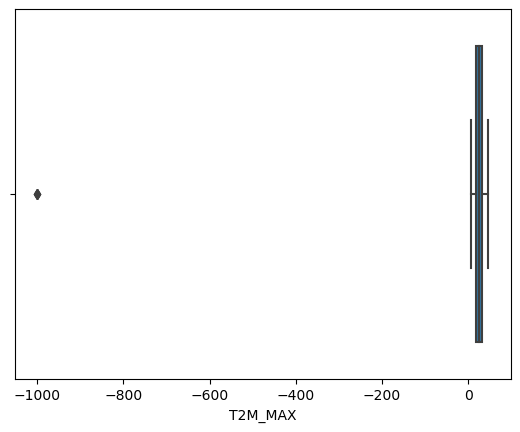

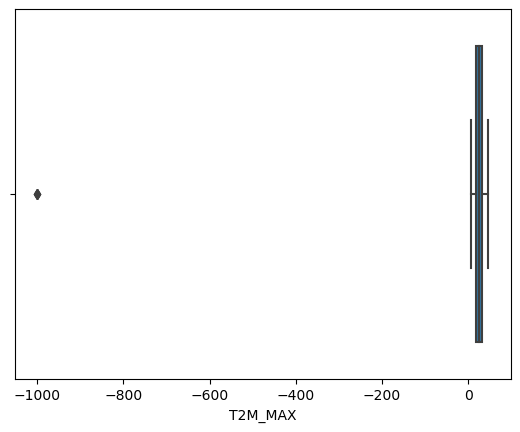

In [8]:
sns.boxplot(x=dataset["T2M_MAX"]) # Hay un valor atípico

<AxesSubplot: xlabel='T2M_MIN'>

<AxesSubplot: xlabel='T2M_MIN'>

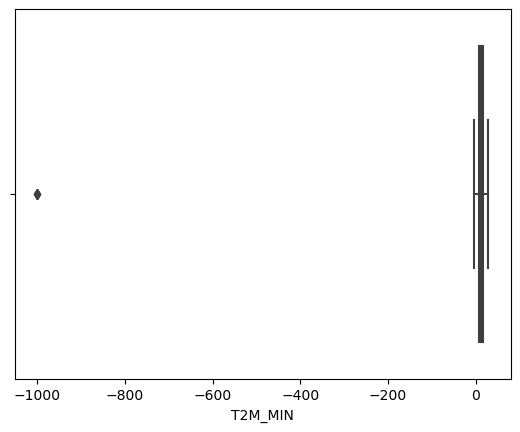

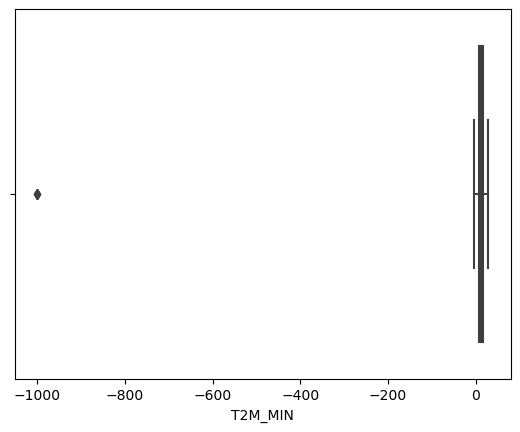

In [9]:
sns.boxplot(x=dataset["T2M_MIN"]) # Hay un valor atípico

### Calcular los límites de los valores atípicos en la temperatura máxima

In [10]:
q1 = np.percentile(dataset["T2M_MAX"], 25)
q3 = np.percentile(dataset["T2M_MAX"], 75)
iqr = q3 - q1
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr

##### Identificar los valores atípicos

In [11]:
outliers = dataset[(dataset["T2M_MAX"] < lower_limit) | (dataset["T2M_MAX"] > upper_limit)]
outliers # Los valores atípicos están los 3 juntos en las filas 14566, 14567 y 14568

,DATE,YEAR,MO,DY,T2M_MAX,T2M_MIN
14566,2022-11-18,2022,11,18,-999.0,-999.0
14567,2022-11-19,2022,11,19,-999.0,-999.0
14568,2022-11-20,2022,11,20,-999.0,-999.0


,DATE,YEAR,MO,DY,T2M_MAX,T2M_MIN
14566,2022-11-18,2022,11,18,-999.0,-999.0
14567,2022-11-19,2022,11,19,-999.0,-999.0
14568,2022-11-20,2022,11,20,-999.0,-999.0


##### Interpolar linealmente para sustituir estos 3 valores atípicos

In [12]:
first = dataset.iloc[14565, :]['T2M_MAX']
last = dataset.iloc[14569, :]['T2M_MAX']

for i in range(1,4):
    dataset.loc[14565 + i, 'T2M_MAX'] = first + (i/4)*(last - first)

<AxesSubplot: xlabel='T2M_MAX'>

<AxesSubplot: xlabel='T2M_MAX'>

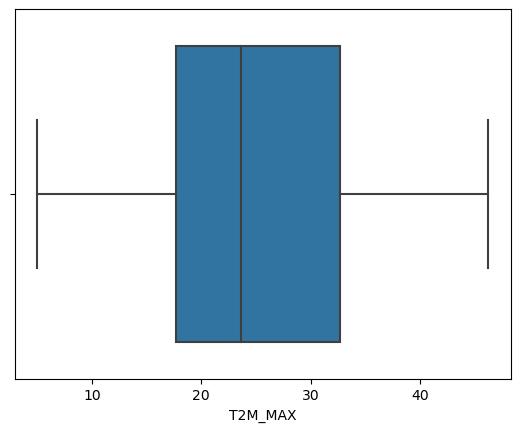

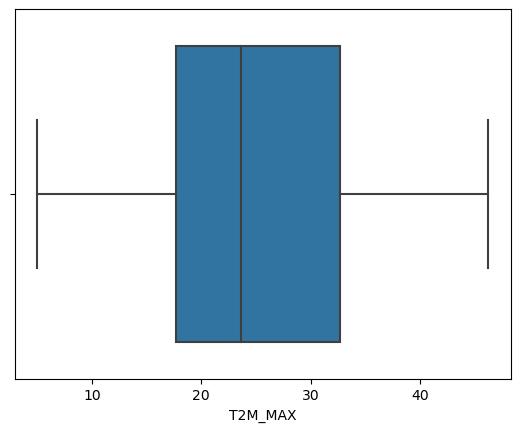

In [13]:
sns.boxplot(x=dataset["T2M_MAX"]) # Ya no hay valores atípicos en la temperatura máxima

### Calcular los límites de los valores atípicos en la temperatura mínima

In [14]:
q1 = np.percentile(dataset["T2M_MIN"], 25)
q3 = np.percentile(dataset["T2M_MIN"], 75)
iqr = q3 - q1
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr

##### Identificar los valores atípicos

In [15]:
outliers = dataset[(dataset["T2M_MIN"] < lower_limit) | (dataset["T2M_MIN"] > upper_limit)]
outliers # Los valores atípicos están también los 3 juntos en las filas 14566, 14567 y 14568

,DATE,YEAR,MO,DY,T2M_MAX,T2M_MIN
14566,2022-11-18,2022,11,18,22.055,-999.0
14567,2022-11-19,2022,11,19,21.620,-999.0
14568,2022-11-20,2022,11,20,21.185,-999.0


,DATE,YEAR,MO,DY,T2M_MAX,T2M_MIN
14566,2022-11-18,2022,11,18,22.055,-999.0
14567,2022-11-19,2022,11,19,21.620,-999.0
14568,2022-11-20,2022,11,20,21.185,-999.0


##### Interpolar linealmente para sustituir estos 3 valores atípicos

In [16]:
first = dataset.iloc[14565, :]['T2M_MIN']
last = dataset.iloc[14569, :]['T2M_MIN']

for i in range(1,4):
    dataset.loc[14565 + i, 'T2M_MIN'] = first + (i/4)*(last - first)

<AxesSubplot: xlabel='T2M_MIN'>

<AxesSubplot: xlabel='T2M_MIN'>

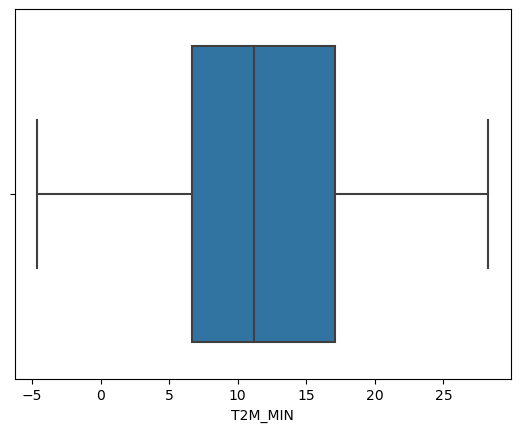

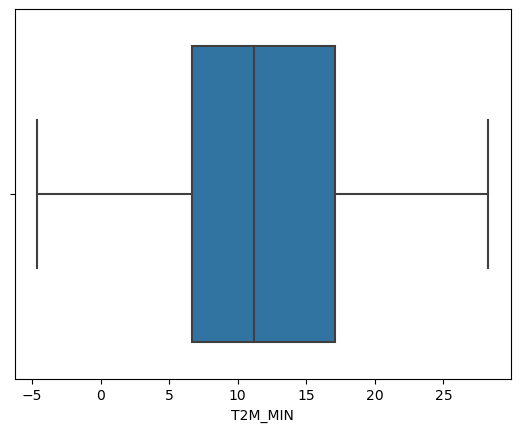

In [17]:
sns.boxplot(x=dataset["T2M_MIN"]) # Ya no hay valores atípicos en la temperatura mínima

## 3- Representación + Descomposición y pequeño análisis gráfico de temperatura máxima

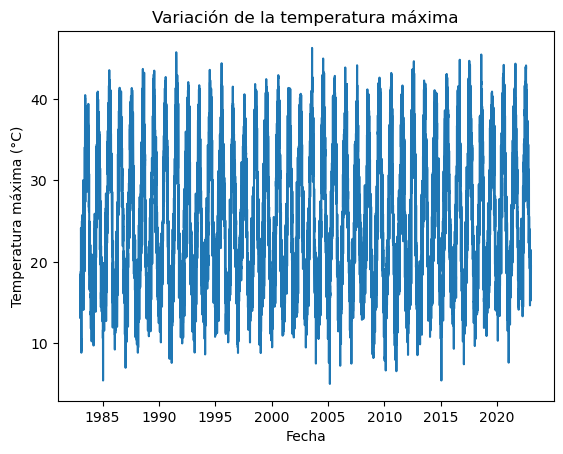

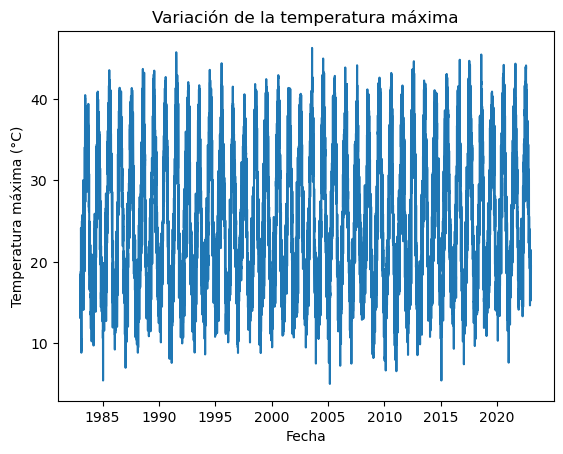

In [18]:
plt.plot(dataset['DATE'], dataset['T2M_MAX'])
plt.title('Variación de la temperatura máxima')
plt.xlabel('Fecha')
plt.ylabel('Temperatura máxima (°C)')
plt.show()

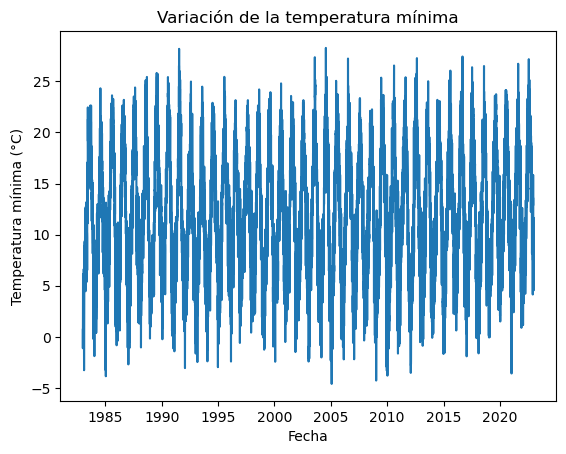

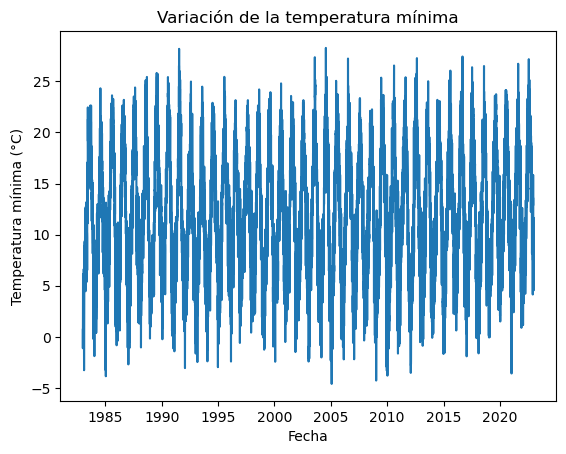

In [19]:
plt.plot(dataset['DATE'], dataset['T2M_MIN'])
plt.title('Variación de la temperatura mínima')
plt.xlabel('Fecha')
plt.ylabel('Temperatura mínima (°C)')
plt.show()

##### Descomponer la serie temperatura máxima en sus componentes de tendencia, estacionalidad y ruido

In [20]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(dataset['T2M_MAX'], model='additive', period=365)

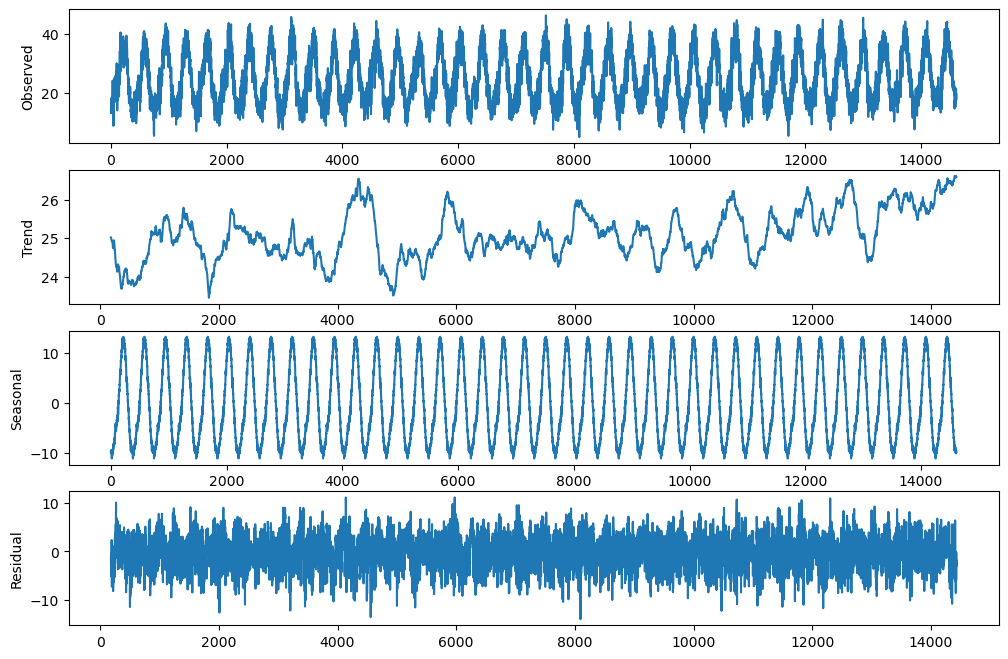

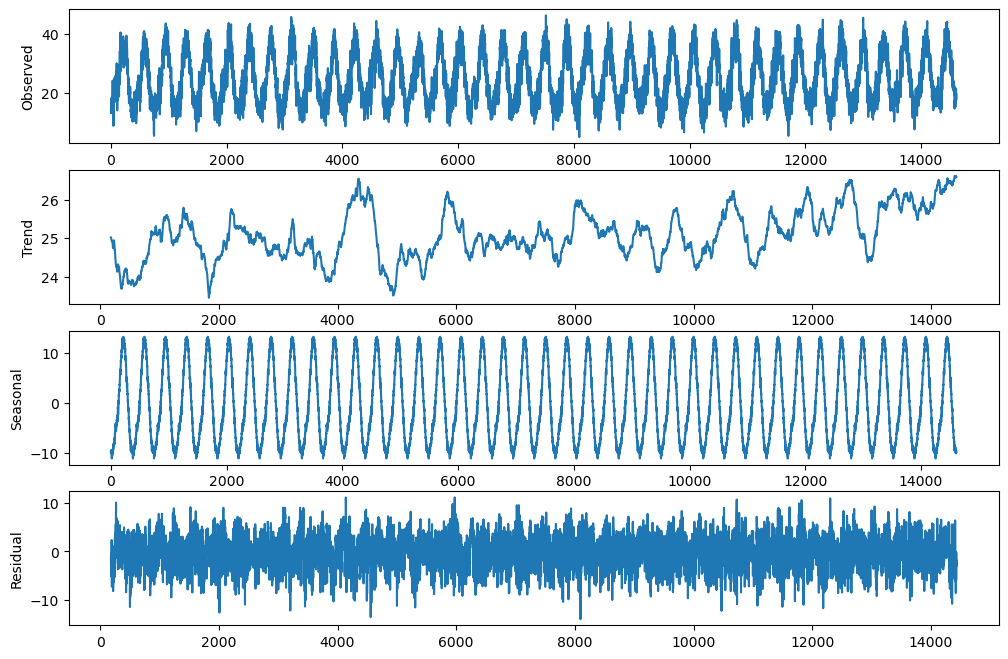

In [21]:
fig, ax = plt.subplots(4, 1, figsize=(12, 8))
decomposition.observed.plot(ax=ax[0], legend=False)
ax[0].set_ylabel('Observed')
decomposition.trend.plot(ax=ax[1], legend=False)
ax[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax[2], legend=False)
ax[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax[3], legend=False)
ax[3].set_ylabel('Residual')
plt.show() # Parece estacionaria, aunque quizás con una ligera tendencia creciente

##### Análisis de correlación

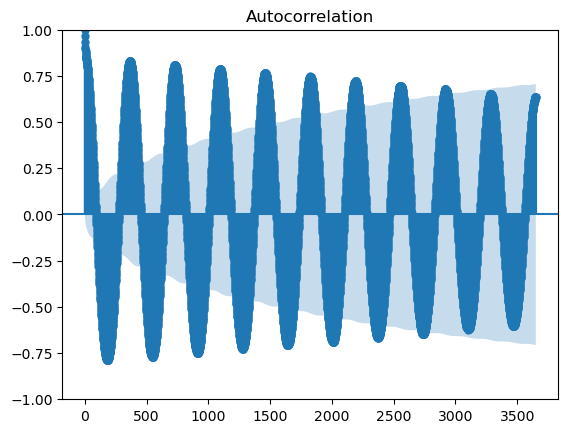

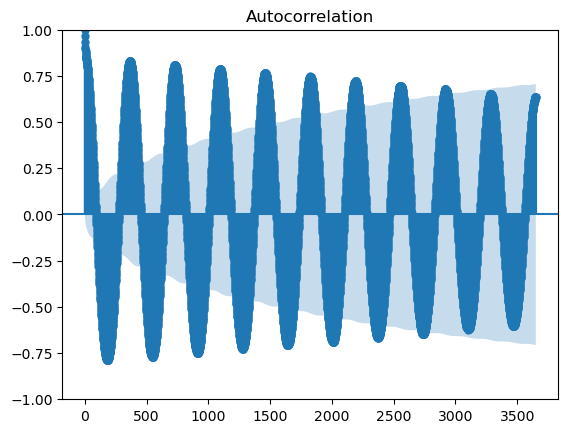

In [22]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dataset["T2M_MAX"].values, lags = 365*10)
plt.show() # Parece estacionaria

# PREPROCESADO PARA LOS MODELOS

## 1- Separación de datos de entrenamiento y de test

Los datos de entrenamiento serán los tomados hasta el último día de 2019 y el resto, hasta el 1 de enero de 2023, serán datos de test.

In [23]:
dataset_training = dataset[dataset["YEAR"]< 2020]
dataset_training

,DATE,YEAR,MO,DY,T2M_MAX,T2M_MIN
0,1983-01-01,1983,1,1,14.24,0.69
1,1983-01-02,1983,1,2,13.11,-1.12
2,1983-01-03,1983,1,3,13.94,0.01
3,1983-01-04,1983,1,4,16.24,0.91
4,1983-01-05,1983,1,5,17.07,3.06
...,...,...,...,...,...,...
13509,2019-12-27,2019,12,27,19.22,7.76
13510,2019-12-28,2019,12,28,19.85,7.19
13511,2019-12-29,2019,12,29,18.30,6.23
13512,2019-12-30,2019,12,30,16.56,4.56


,DATE,YEAR,MO,DY,T2M_MAX,T2M_MIN
0,1983-01-01,1983,1,1,14.24,0.69
1,1983-01-02,1983,1,2,13.11,-1.12
2,1983-01-03,1983,1,3,13.94,0.01
3,1983-01-04,1983,1,4,16.24,0.91
4,1983-01-05,1983,1,5,17.07,3.06
...,...,...,...,...,...,...
13509,2019-12-27,2019,12,27,19.22,7.76
13510,2019-12-28,2019,12,28,19.85,7.19
13511,2019-12-29,2019,12,29,18.30,6.23
13512,2019-12-30,2019,12,30,16.56,4.56


In [24]:
dataset_test = dataset[dataset["YEAR"] >= 2020]
dataset_test

,DATE,YEAR,MO,DY,T2M_MAX,T2M_MIN
13514,2020-01-01,2020,1,1,16.14,4.26
13515,2020-01-02,2020,1,2,15.90,3.82
13516,2020-01-03,2020,1,3,15.13,4.83
13517,2020-01-04,2020,1,4,14.34,2.05
13518,2020-01-05,2020,1,5,16.06,5.30
...,...,...,...,...,...,...
14606,2022-12-28,2022,12,28,19.92,7.19
14607,2022-12-29,2022,12,29,17.58,7.56
14608,2022-12-30,2022,12,30,18.35,8.64
14609,2022-12-31,2022,12,31,17.90,4.55


,DATE,YEAR,MO,DY,T2M_MAX,T2M_MIN
13514,2020-01-01,2020,1,1,16.14,4.26
13515,2020-01-02,2020,1,2,15.90,3.82
13516,2020-01-03,2020,1,3,15.13,4.83
13517,2020-01-04,2020,1,4,14.34,2.05
13518,2020-01-05,2020,1,5,16.06,5.30
...,...,...,...,...,...,...
14606,2022-12-28,2022,12,28,19.92,7.19
14607,2022-12-29,2022,12,29,17.58,7.56
14608,2022-12-30,2022,12,30,18.35,8.64
14609,2022-12-31,2022,12,31,17.90,4.55


In [25]:
training_set = dataset_training.iloc[:, [2,4,5]].values # Mes, temp. máxima y temp. mínima de los datos de entrenamiento
real_values = dataset_test.iloc[:, [4]].values # Temperatura máxima de los datos de test
forecast_dates = dataset_test.iloc[:, 0].values # Fechas de los datos de test, que serán también las de las predicciones

## 2- Escalado de los datos

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(training_set)
training_set_scaled = scaler.transform(training_set)


## 3- Creación de la estructura de datos

In [27]:
X_train = [] 
y_train = [] # Ambas listas vacías servirán para almacenar datos de entrenamiento
n_future = 1   # Número de días en el futuro que queremos predecir
n_past = 90  # Número de días anteriores que usamos para predecir

El proximo bucle iterará a través de un bucle for desde `n_past` hasta la longitud del conjunto de datos de entrenamiento (`training_set_scaled`) menos `n_future` + 1. Esto permite seleccionar ventanas de datos de tamaño `n_past` para el entrenamiento.

Dentro del bucle, se agregan los datos de entrada y de salida correspondientes a las listas `X_train` e `y_train`, respectivamente.

- `X_train` contiene las secuencias de `n_past` días anteriores como características de entrada para el modelo.

- `y_train` contiene el valor correspondiente al día siguiente después de las `n_past` observaciones, que es el valor que se desea predecir.

Finalmente, se convierten las listas `X_train` e `y_train` en matrices numpy utilizando `np.array()`.

In [28]:
for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, :])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 1])

X_train, y_train = np.array(X_train), np.array(y_train)

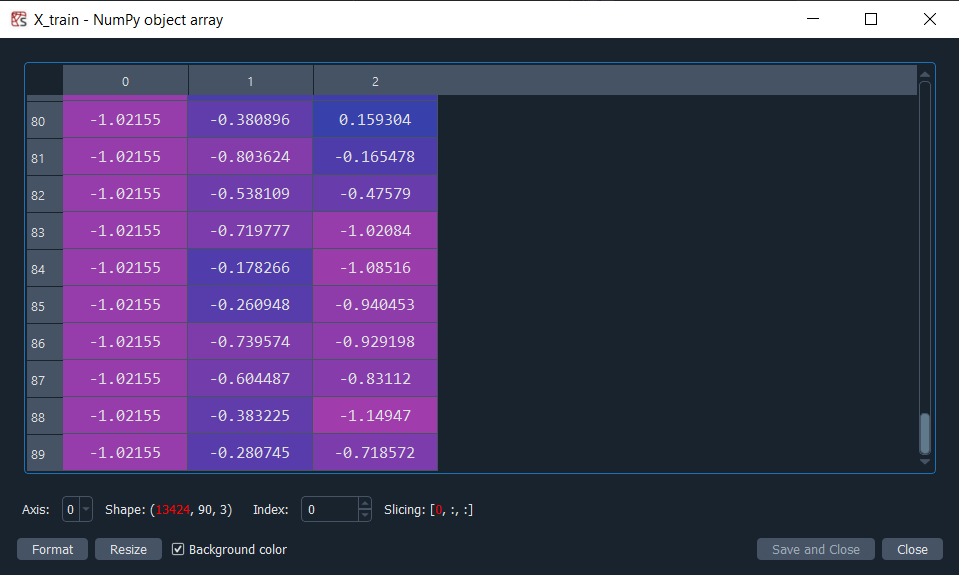

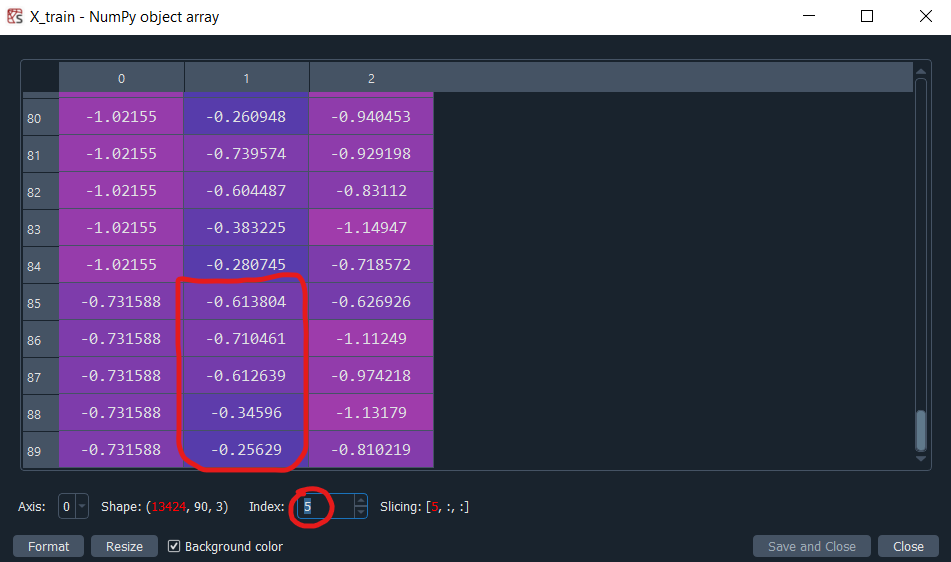

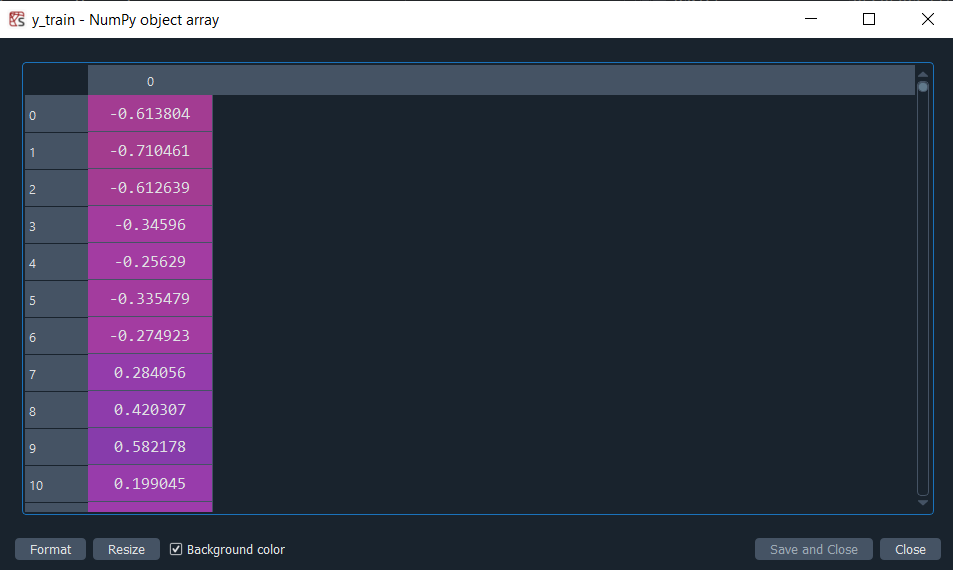

##### Repetimos ahora para los datos de test. 
Primero hay que conseguir el set de datos correspondiente. Éste comienza `n_past` días antes del primer día de 2020

In [29]:
index = dataset_test.index[0]  # Índice del primer registro de 2020
test_set = dataset.iloc[(index-n_past):, [2,4,5]].values # Mes y temperaturas máxima y mínima comenzando n_past días atrás
test_set_scaled = scaler.transform(test_set)
X_test = []
y_test = []

for i in range(n_past, len(test_set_scaled) - n_future +1):
    X_test.append(test_set_scaled[i - n_past:i, :])
    y_test.append(test_set_scaled[i + n_future - 1:i + n_future, 1])
    
X_test, y_test = np.array(X_test), np.array(y_test)

# CREACIÓN Y ENTRENAMIENTO DE LOS MODELOS + GRÁFICOS

In [30]:
# Importamos las librerías necesarias para todos los modelos
from keras.models import Sequential
from keras.layers import Conv1D, Flatten, MaxPooling1D
from keras.layers import GRU, LSTM
from keras.layers import Dense, Dropout

from keras import backend as K # Para acceder a las funciones y operaciones del backend de Keras

import time # Para el monitorio y registro de los tiempos de ejecución
import psutil #Para el monitoreo y registro de los recursos del equipo

## 1- CNN + definición de funciones para el resto de modelos

In [31]:
# Definimos el rmse (root square mean error) ya que no está en las métricas de Keras
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [32]:
# Definimos igualmente el R2 (R-squared)
def r2(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    r2 = 1 - SS_res / (SS_tot + K.epsilon())
    return r2

#### El código del próximo prompt crea y compila un modelo de red neuronal convolucional (CNN) con la métrica mse (mean squared error) para la función de pérdida. A continuación, se explica qué hace cada parte del código:

1. Se crea un modelo de tipo secuencial (`Sequential`), que es una pila lineal de capas.

2. Se agregan capas al modelo:
   - Capa convolucional (`Conv1D`) con 64 filtros, un tamaño de kernel de 2 y función de activación 'relu'. La capa recibe una entrada con forma `(X_train.shape[1], X_train.shape[2])`, lo que significa que espera secuencias de datos con `X_train.shape[1]` pasos de tiempo y `X_train.shape[2]` características en cada paso de tiempo.
   - Capa de aplanamiento (`Flatten`) para convertir el tensor de salida de la capa convolucional en un vector unidimensional.
   - Capa de desactivación aleatoria (`Dropout`) con una tasa de desactivación del 20% para evitar el sobreajuste.
   - Capa densa (`Dense`) con 32 unidades y función de activación 'relu'.
   - Otra capa de desactivación aleatoria (`Dropout`) con una tasa de desactivación del 20%.
   - Capa densa (`Dense`) con un número de unidades igual a la dimensión de la variable de salida `y_train`.

3. Se compila el modelo utilizando el optimizador "adam" y la pérdida "mse" (error cuadrático medio) como función de pérdida. Además, se especifican métricas adicionales a evaluar durante el entrenamiento, incluyendo "rmse" (raíz cuadrada del error cuadrático medio), "mae" (error absoluto medio) y "r2" (coeficiente de determinación).

4. Se imprime un resumen del modelo utilizando el método `summary()` para mostrar la arquitectura y el número de parámetros entrenables.

In [33]:
model_CNN = Sequential()
model_CNN.add(Conv1D(64, kernel_size=2, activation='relu', 
                     input_shape=(X_train.shape[1], X_train.shape[2])))
model_CNN.add(Flatten())
model_CNN.add(Dropout(0.2))
model_CNN.add(Dense(32, activation='relu'))
model_CNN.add(Dropout(0.2))
model_CNN.add(Dense(y_train.shape[1]))

model_CNN.compile(optimizer='adam', loss='mse', metrics=[rmse, 'mae', r2])
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
Model: "sequential"
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 89, 64)            448       
                                                                 
 flatten (Flatten)           (None, 5696)              0         
                                                                 
 dropout (Dropout)           (None, 5696)              0         
                                                                 
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 89, 64)            448       
                                                                 
 flatten (Flatten)           (None, 5696)              0         
                                                                 
 dropout (Dropout)           (None, 

#### Ajustar el modelo con los datos de entrenamiento y compror el training y validation loss

La función `train_model`, definida a continuación, tiene como objetivo secundario monitorizar los recursos del equipo y el tiempo transcurrido hasta completar el ajuste del modelo, sin embargo su objetivo principal es esto último, el ajuste del modelo. En cuanto  a esto, esta función realiza lo siguiente:
1. Toma como entrada un modelo de tipo Keras que se pasa como argumento `model`.

2. Se utiliza el método `fit` del modelo para entrenarlo utilizando los datos de entrenamiento y validación proporcionados. Los argumentos utilizados son los siguientes:
   - `X_train` y `y_train` son los datos de entrenamiento de las series temporales.
   - `epochs=30` especifica el número de épocas de entrenamiento.
   - `batch_size=16` indica el tamaño de lote utilizado durante el entrenamiento.
   - `validation_data=(X_test, y_test)` proporciona los datos de validación para evaluar el modelo durante el entrenamiento.
   - `verbose=1` muestra información detallada durante el entrenamiento.

3. El método `fit` devuelve un objeto `history` que contiene información sobre la evolución del entrenamiento, como la pérdida y las métricas calculadas en cada época.

4. Finalmente, se devuelve el objeto `history` utilizando `return history`. Esto permite acceder a la información del entrenamiento y utilizarla posteriormente para el análisis o la visualización.

In [34]:
def train_model(model):
    cpu_before = psutil.cpu_percent() # Monitoreo del cpu
    memory_before = psutil.virtual_memory().percent # Monitoreo de la memoria
    start_time = time.time() # Registro del tiempo de inicio

    history = model.fit(X_train, y_train, epochs=30, batch_size=16, 
                        validation_data=(X_test, y_test), verbose=1) ## (VER EXPLICACIÓN ARRIBA)
    
    end_time = time.time() # Registro del tiempo de finalización
    cpu_after = psutil.cpu_percent() #Cálculo cpu
    memory_after = psutil.virtual_memory().percent #Cálculo memoria
    elapsed_time = end_time - start_time # Cálculo del tiempo transcurrido

    print("Uso de CPU antes del entrenamiento:", cpu_before, "%")
    print("Uso de memoria antes del entrenamiento:", memory_before, "%")
    print("Uso de CPU después del entrenamiento:", cpu_after, "%")
    print("Uso de memoria después del entrenamiento:", memory_after, "%")
    print("Tiempo total de ejecución:", int(elapsed_time), "segundos")

    return history

In [35]:
history_CNN = train_model(model_CNN)

Epoch 1/30
Epoch 1/30
839/839 [==============================] - 6s 5ms/step - loss: 0.1693 - rmse: 0.4010 - mae: 0.3244 - r2: 0.8117 - val_loss: 0.0888 - val_rmse: 0.2889 - val_mae: 0.2381 - val_r2: -0.1595
Epoch 2/30
839/839 [==============================] - 6s 5ms/step - loss: 0.1693 - rmse: 0.4010 - mae: 0.3244 - r2: 0.8117 - val_loss: 0.0888 - val_rmse: 0.2889 - val_mae: 0.2381 - val_r2: -0.1595
Epoch 2/30
839/839 [==============================] - 5s 6ms/step - loss: 0.1246 - rmse: 0.3468 - mae: 0.2794 - r2: 0.8616 - val_loss: 0.0788 - val_rmse: 0.2716 - val_mae: 0.2246 - val_r2: 0.0016
Epoch 3/30
839/839 [==============================] - 5s 6ms/step - loss: 0.1246 - rmse: 0.3468 - mae: 0.2794 - r2: 0.8616 - val_loss: 0.0788 - val_rmse: 0.2716 - val_mae: 0.2246 - val_r2: 0.0016
Epoch 3/30
839/839 [==============================] - 5s 6ms/step - loss: 0.1136 - rmse: 0.3313 - mae: 0.2661 - r2: 0.8742 - val_loss: 0.0730 - val_rmse: 0.2620 - val_mae: 0.2155 - val_r2: 0.0486
Epoch 4

Epoch 22/30
839/839 [==============================] - 5s 6ms/step - loss: 0.0971 - rmse: 0.3052 - mae: 0.2442 - r2: 0.8911 - val_loss: 0.0735 - val_rmse: 0.2633 - val_mae: 0.2162 - val_r2: 0.0529
Epoch 23/30
839/839 [==============================] - 5s 6ms/step - loss: 0.0971 - rmse: 0.3052 - mae: 0.2442 - r2: 0.8911 - val_loss: 0.0735 - val_rmse: 0.2633 - val_mae: 0.2162 - val_r2: 0.0529
Epoch 23/30
839/839 [==============================] - 5s 6ms/step - loss: 0.0950 - rmse: 0.3019 - mae: 0.2410 - r2: 0.8950 - val_loss: 0.0763 - val_rmse: 0.2680 - val_mae: 0.2189 - val_r2: -0.0094
Epoch 24/30
839/839 [==============================] - 5s 6ms/step - loss: 0.0950 - rmse: 0.3019 - mae: 0.2410 - r2: 0.8950 - val_loss: 0.0763 - val_rmse: 0.2680 - val_mae: 0.2189 - val_r2: -0.0094
Epoch 24/30
839/839 [==============================] - 5s 6ms/step - loss: 0.0934 - rmse: 0.2998 - mae: 0.2393 - r2: 0.8964 - val_loss: 0.0852 - val_rmse: 0.2807 - val_mae: 0.2329 - val_r2: -0.1121
Epoch 25/30


In [36]:
def plot_loss(history_modelo):
    """Grafica las curvas de pérdida de entrenamiento y validación, así como las métricas RMSE, MAE y R2"""
    plt.figure(figsize=(10, 6))
    
    # Loss
    plt.subplot(2, 2, 1)
    plt.plot(history_modelo.history['loss'], label='Training loss(mse)')
    plt.plot(history_modelo.history['val_loss'], label='Validation loss(mse)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # RMSE
    plt.subplot(2, 2, 2)
    plt.plot(history_modelo.history['rmse'], label='Training RMSE')
    plt.plot(history_modelo.history['val_rmse'], label='Validation RMSE')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()

    # MAE
    plt.subplot(2, 2, 3)
    plt.plot(history_modelo.history['mae'], label='Training MAE')
    plt.plot(history_modelo.history['val_mae'], label='Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

    # R2
    plt.subplot(2, 2, 4)
    plt.plot(history_modelo.history['r2'], label='Training R2')
    plt.plot(history_modelo.history['val_r2'], label='Validation R2')
    plt.xlabel('Epochs')
    plt.ylabel('R2')
    plt.legend()

    plt.tight_layout()
    plt.show()

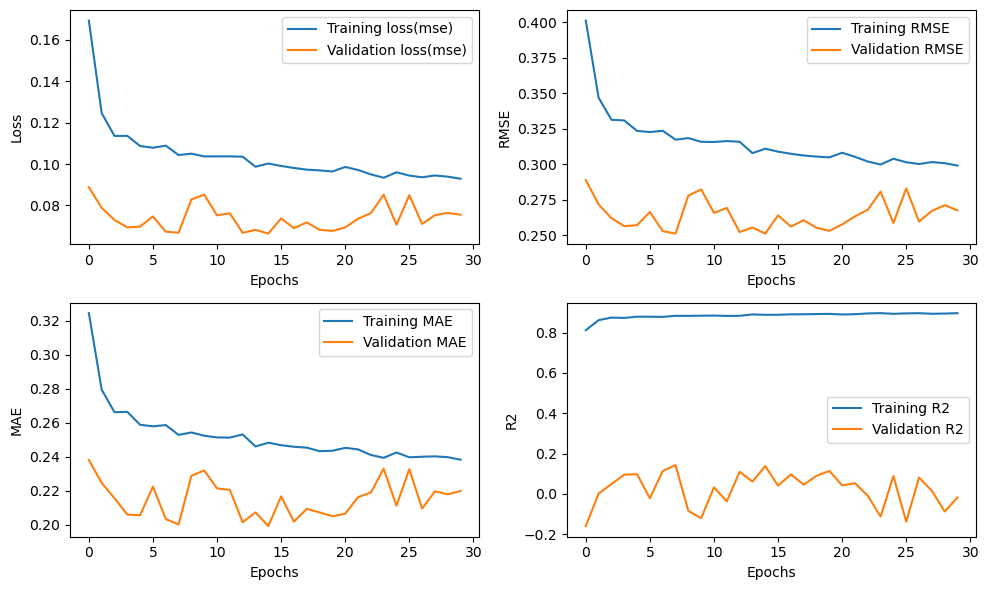

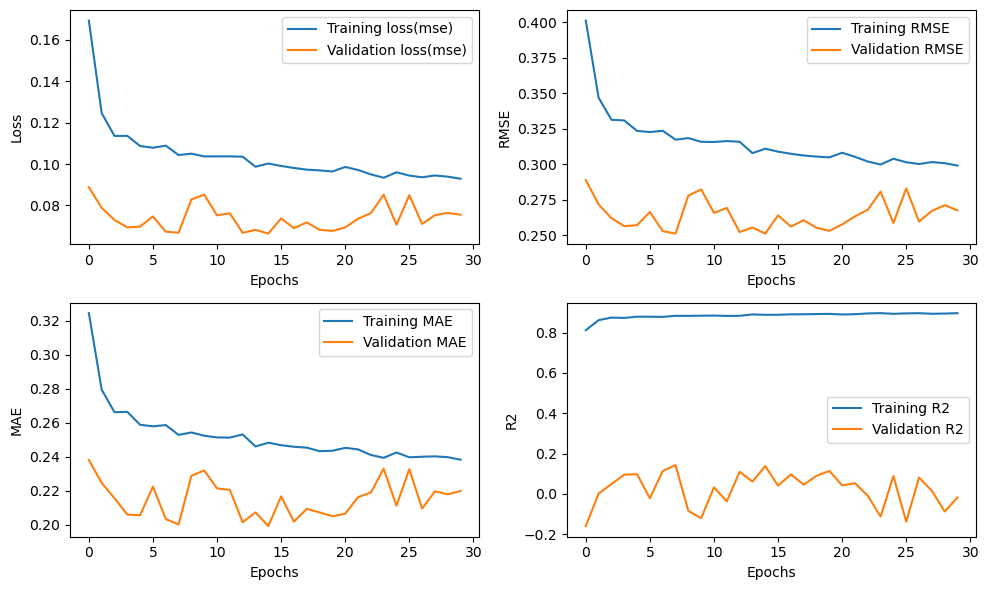

In [37]:
plot_loss(history_CNN)

#### Calcular el vector de predicciones

In [38]:
def generate_forecast(model):
    """Calcula el vector de predicciones de X_test con respecto al modelo  model, dado como dato de entrada"""
    forecast_scaled = model.predict(X_test)
    forecast_scaled_copies = np.repeat(forecast_scaled, training_set.shape[1], axis=-1)
    forecast = scaler.inverse_transform(forecast_scaled_copies)[:, [1]]
    
    return forecast

In [39]:
forecast_CNN = generate_forecast(model_CNN)

35/35 [==============================] - 0s 2ms/step


#### Representación de resultados

In [40]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [41]:
def generate_plot(forecast):
    # Crear la figura con subtramas
    fig = make_subplots(rows=1, cols=1)

    # Agregar la traza para los datos de forecast y forecast_dates
    fig.add_trace(go.Scatter(x=forecast_dates, y=forecast.flatten(), mode='lines', name='Forecast'))

    # Agregar la traza para los datos de real_values
    fig.add_trace(go.Scatter(x=forecast_dates, y=real_values.flatten(), mode='lines', name='Real Values'))

    # Personalizar el diseño de la gráfica
    fig.update_layout(title='Forecast vs Real Values', xaxis_title='Fecha', yaxis_title='Valor')

    # Mostrar la gráfica
    fig.show()

In [60]:
generate_plot(forecast_CNN)

## 2- LSTM

El código del model_LSTM, proporcionado a continuación, define y compila un modelo de red neuronal recurrente LSTM (Long Short-Term Memory). Aquí está una explicación paso a paso de lo que hace cada línea de código:

1. Se crea un objeto de modelo secuencial llamado `model_LSTM`.

2. Se agrega una capa LSTM al modelo con 64 unidades y activación "tanh". La capa recibe una entrada con forma `(X_train.shape[1], X_train.shape[2])`. Además, se establece `return_sequences=True` para que la capa LSTM devuelva secuencias de salidas en lugar de una única salida.

3. Se agrega una capa de dropout con una tasa de 0.2 para regularizar la red y evitar el sobreajuste.

4. Se agrega otra capa LSTM al modelo con 64 unidades y activación "tanh". También se establece `return_sequences=True` para mantener la salida como una secuencia.

5. Se agrega otra capa de dropout con una tasa de 0.2.

6. Se agrega una tercera capa LSTM al modelo con 32 unidades y activación "tanh". Esta vez, `return_sequences` se establece en `False` para que la capa LSTM devuelva solo la última salida de la secuencia.

7. Se agrega otra capa de dropout con una tasa de 0.2.

8. Se agrega una capa densa (fully connected) al modelo con tantas unidades como características de salida (`y_train.shape[1]`). Esta capa genera las predicciones finales.

9. Se compila el modelo utilizando el optimizador "adam" y la pérdida "mse" (error cuadrático medio) como función de pérdida. Además, se especifican métricas adicionales a evaluar durante el entrenamiento, incluyendo "rmse" (raíz cuadrada del error cuadrático medio), "mae" (error absoluto medio) y "r2" (coeficiente de determinación).

10. Se muestra un resumen del modelo, que proporciona una descripción de cada capa, su forma de salida y el número de parámetros entrenables.

In [44]:
model_LSTM = Sequential()
model_LSTM.add(LSTM(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2]), 
               return_sequences = True))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(64, activation = 'tanh', return_sequences = True))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(32, activation = 'tanh', return_sequences = False))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(Dense(y_train.shape[1]))

model_LSTM.compile(optimizer='adam', loss='mse', metrics=[rmse, 'mae', r2])
model_LSTM.summary()

Model: "sequential_1"
_________________________________________________________________
Model: "sequential_1"
 Layer (type)                Output Shape              Param #   
_________________________________________________________________
 lstm (LSTM)                 (None, 90, 64)            17408     
 Layer (type)                Output Shape              Param #   
                                                                 
 dropout_2 (Dropout)         (None, 90, 64)            0         
                                                                 
 lstm (LSTM)                 (None, 90, 64)            17408     
                                                                 
 dropout_2 (Dropout)         (None, 90, 64)            0         
 lstm_1 (LSTM)               (None, 90, 64)            33024     
                                                                 
                                                                 
 dropout_3 (Dropout)         (No

In [45]:
history_LSTM = train_model(model_LSTM)

Epoch 1/30
Epoch 1/30
839/839 [==============================] - 55s 60ms/step - loss: 0.1518 - rmse: 0.3817 - mae: 0.3074 - r2: 0.8281 - val_loss: 0.0995 - val_rmse: 0.3051 - val_mae: 0.2552 - val_r2: -0.1936
Epoch 2/30
839/839 [==============================] - 55s 60ms/step - loss: 0.1518 - rmse: 0.3817 - mae: 0.3074 - r2: 0.8281 - val_loss: 0.0995 - val_rmse: 0.3051 - val_mae: 0.2552 - val_r2: -0.1936
Epoch 2/30
839/839 [==============================] - 49s 59ms/step - loss: 0.0915 - rmse: 0.2965 - mae: 0.2382 - r2: 0.8970 - val_loss: 0.0656 - val_rmse: 0.2481 - val_mae: 0.1999 - val_r2: 0.1781
Epoch 3/30
839/839 [==============================] - 49s 59ms/step - loss: 0.0915 - rmse: 0.2965 - mae: 0.2382 - r2: 0.8970 - val_loss: 0.0656 - val_rmse: 0.2481 - val_mae: 0.1999 - val_r2: 0.1781
Epoch 3/30
839/839 [==============================] - 49s 59ms/step - loss: 0.0796 - rmse: 0.2768 - mae: 0.2209 - r2: 0.9094 - val_loss: 0.0721 - val_rmse: 0.2633 - val_mae: 0.2120 - val_r2: -0.0

Epoch 22/30
839/839 [==============================] - 50s 59ms/step - loss: 0.0744 - rmse: 0.2673 - mae: 0.2128 - r2: 0.9152 - val_loss: 0.0605 - val_rmse: 0.2379 - val_mae: 0.1886 - val_r2: 0.2368
Epoch 23/30
839/839 [==============================] - 50s 59ms/step - loss: 0.0744 - rmse: 0.2673 - mae: 0.2128 - r2: 0.9152 - val_loss: 0.0605 - val_rmse: 0.2379 - val_mae: 0.1886 - val_r2: 0.2368
Epoch 23/30
839/839 [==============================] - 50s 60ms/step - loss: 0.0726 - rmse: 0.2643 - mae: 0.2107 - r2: 0.9175 - val_loss: 0.0609 - val_rmse: 0.2390 - val_mae: 0.1898 - val_r2: 0.2408
Epoch 24/30
Epoch 24/30
839/839 [==============================] - 50s 60ms/step - loss: 0.0738 - rmse: 0.2666 - mae: 0.2122 - r2: 0.9146 - val_loss: 0.0629 - val_rmse: 0.2442 - val_mae: 0.1994 - val_r2: 0.1650
Epoch 25/30
839/839 [==============================] - 50s 60ms/step - loss: 0.0738 - rmse: 0.2666 - mae: 0.2122 - r2: 0.9146 - val_loss: 0.0629 - val_rmse: 0.2442 - val_mae: 0.1994 - val_r2: 

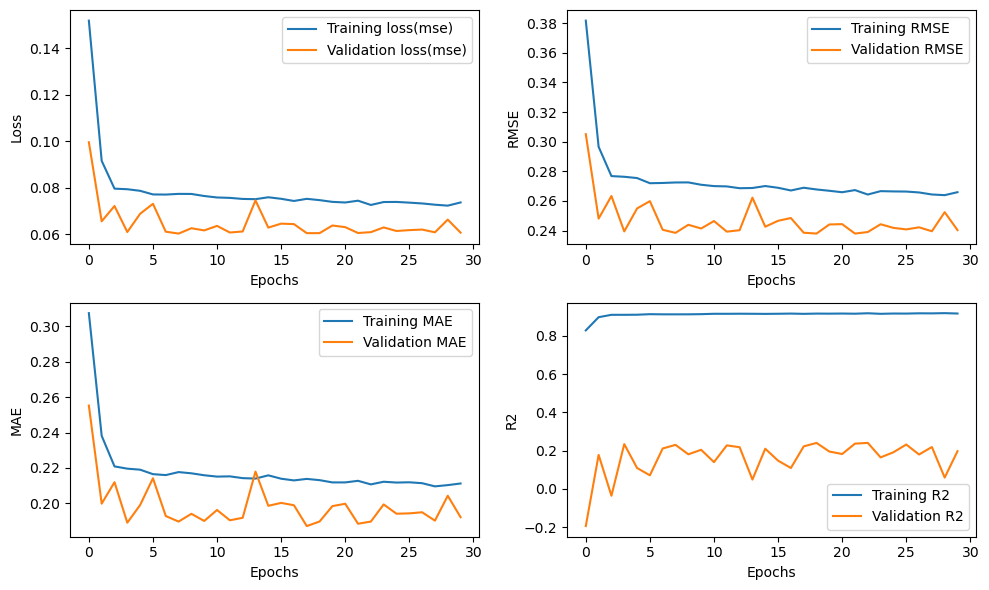

In [46]:
plot_loss(history_LSTM)

In [47]:
forecast_LSTM = generate_forecast(model_LSTM)

35/35 [==============================] - 2s 24ms/step


In [48]:
generate_plot(forecast_LSTM)

## 3- GRU

El código del model_GRU escrito en el siguiente prompt define y compila un modelo de red neuronal recurrente GRU (Gated Recurrent Unit). Aquí está una explicación paso a paso de lo que hace cada línea de código:

1. Se crea un objeto de modelo secuencial llamado `model_GRU`.

2. Se agrega una capa GRU al modelo con 64 unidades y activación "tanh". La capa recibe una entrada con forma `(X_train.shape[1], X_train.shape[2])`. Además, se establece `return_sequences=True` para que la capa GRU devuelva secuencias de salidas en lugar de una única salida.

3. Se agrega una capa de dropout con una tasa de 0.2 para regularizar la red y evitar el sobreajuste.

4. Se agrega otra capa GRU al modelo con 64 unidades y activación "tanh". También se establece `return_sequences=True` para mantener la salida como una secuencia.

5. Se agrega otra capa de dropout con una tasa de 0.2.

6. Se agrega una cuarta capa GRU al modelo con 32 unidades y activación "tanh". Esta vez, `return_sequences` se establece en `False` para que la capa GRU devuelva solo la última salida de la secuencia.

7. Se agrega otra capa de dropout con una tasa de 0.2.

8. Se agrega una capa densa (fully connected) al modelo con tantas unidades como características de salida (`y_train.shape[1]`). Esta capa genera las predicciones finales.

9. Se compila el modelo utilizando el optimizador "adam" y la pérdida "mse" (error cuadrático medio) como función de pérdida. Además, se especifican métricas adicionales a evaluar durante el entrenamiento, incluyendo "rmse" (raíz cuadrada del error cuadrático medio), "mae" (error absoluto medio) y "r2" (coeficiente de determinación).

10. Se muestra un resumen del modelo, que proporciona una descripción de cada capa, su forma de salida y el número de parámetros entrenables.

In [62]:
model_GRU = Sequential()
model_GRU.add(GRU(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2]), 
               return_sequences = True))
model_GRU.add(Dropout(0.2))
model_GRU.add(GRU(64, activation = 'tanh', return_sequences = True))
model_GRU.add(Dropout(0.2))
model_GRU.add(GRU(32, activation = 'tanh', return_sequences = False))
model_GRU.add(Dropout(0.2))
model_GRU.add(Dense(y_train.shape[1]))

model_GRU.compile(optimizer='adam', loss='mse', metrics=[rmse, 'mae', r2])
model_GRU.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 90, 64)            13248     
                                                                 
 dropout_9 (Dropout)         (None, 90, 64)            0         
                                                                 
 gru_5 (GRU)                 (None, 90, 64)            24960     
                                                                 
 dropout_10 (Dropout)        (None, 90, 64)            0         
                                                                 
 gru_6 (GRU)                 (None, 32)                9408      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                

In [63]:
history_GRU = train_model(model_GRU)

Epoch 1/30
839/839 [==============================] - 41s 46ms/step - loss: 0.1122 - rmse: 0.3249 - mae: 0.2610 - r2: 0.8726 - val_loss: 0.0652 - val_rmse: 0.2491 - val_mae: 0.1992 - val_r2: 0.1382
Epoch 2/30
839/839 [==============================] - 36s 43ms/step - loss: 0.0846 - rmse: 0.2852 - mae: 0.2280 - r2: 0.9038 - val_loss: 0.0616 - val_rmse: 0.2403 - val_mae: 0.1901 - val_r2: 0.2217
Epoch 3/30
839/839 [==============================] - 36s 43ms/step - loss: 0.0803 - rmse: 0.2777 - mae: 0.2217 - r2: 0.9089 - val_loss: 0.0612 - val_rmse: 0.2404 - val_mae: 0.1922 - val_r2: 0.2087
Epoch 4/30
839/839 [==============================] - 38s 45ms/step - loss: 0.0791 - rmse: 0.2759 - mae: 0.2199 - r2: 0.9098 - val_loss: 0.0628 - val_rmse: 0.2437 - val_mae: 0.1913 - val_r2: 0.1754
Epoch 5/30
839/839 [==============================] - 37s 44ms/step - loss: 0.0787 - rmse: 0.2755 - mae: 0.2196 - r2: 0.9110 - val_loss: 0.0624 - val_rmse: 0.2438 - val_mae: 0.1948 - val_r2: 0.1702
Epoch 6/30

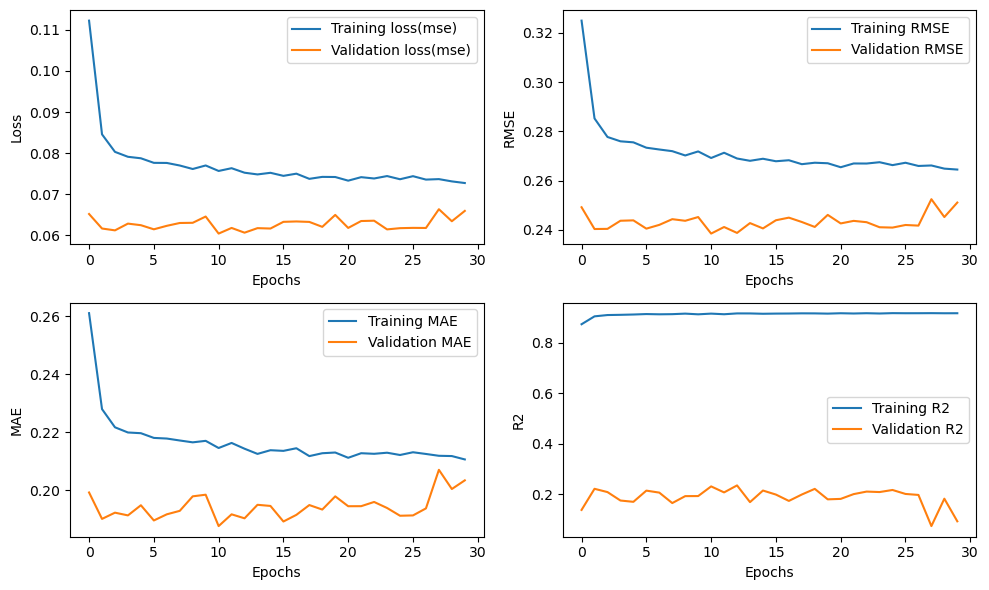

In [64]:
plot_loss(history_GRU)

In [65]:
forecast_GRU = generate_forecast(model_GRU)

35/35 [==============================] - 1s 16ms/step


In [66]:
generate_plot(forecast_GRU)